In [85]:
# Load the required dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor

from scipy import stats
from scipy.stats import linregress
from scipy.stats import f_oneway

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError


from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', 150, 'display.max_rows', 255)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Read in the File and preview it.
file_path = Path("secondary_housing_data.csv")
df = pd.read_csv(file_path)
df.head()

,MSSubClass,LotArea,OverallCond,Exterior1st,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,Neighborhood,Age,SalePrice
0,60,8450,5,VinylSd,856,Y,1710,2,1,3,1,8,548,CollgCr,5,208500
1,20,9600,8,MetalSd,1262,Y,1262,2,0,3,1,6,460,Veenker,31,181500
2,60,11250,5,VinylSd,920,Y,1786,2,1,3,1,6,608,CollgCr,7,223500
3,70,9550,5,Wd Sdng,756,Y,1717,1,0,3,1,7,642,Crawfor,91,140000
4,60,14260,5,VinylSd,1145,Y,2198,2,1,4,1,9,836,NoRidge,8,250000


In [3]:
df["LotArea"].describe()

count     1,460.00
mean     10,516.83
std       9,981.26
min       1,300.00
25%       7,553.50
50%       9,478.50
75%      11,601.50
max     215,245.00
Name: LotArea, dtype: float64

In [4]:
# Set list of columns to keep for analysis
housing_df = df.copy()
housing_df.head()

,MSSubClass,LotArea,OverallCond,Exterior1st,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,Neighborhood,Age,SalePrice
0,60,8450,5,VinylSd,856,Y,1710,2,1,3,1,8,548,CollgCr,5,208500
1,20,9600,8,MetalSd,1262,Y,1262,2,0,3,1,6,460,Veenker,31,181500
2,60,11250,5,VinylSd,920,Y,1786,2,1,3,1,6,608,CollgCr,7,223500
3,70,9550,5,Wd Sdng,756,Y,1717,1,0,3,1,7,642,Crawfor,91,140000
4,60,14260,5,VinylSd,1145,Y,2198,2,1,4,1,9,836,NoRidge,8,250000


In [5]:
# Home prices by the year Sold
housing_df.groupby(['Age']).agg({'SalePrice':['mean','median','std','min', 'max', 'count']}).head(20)


SalePrice                                            
          mean     median        std     min     max count
Age                                                       
0   264,302.23 243,289.00  83,322.06   84500  465000    64
1   266,914.00 235,064.00 108,857.14  140000  611657   100
2   223,247.85 203,000.00  67,825.64  130000  378500    39
3   253,159.72 245,500.00  69,556.34  148000  377500    36
4   199,063.41 192,500.00  42,747.69  131500  312500    41
5   235,136.67 222,450.00  62,884.17  136500  412500    30
6   223,234.53 217,500.00  68,687.78  140000  466500    30
7   223,333.33 207,500.00  76,548.18  140000  538000    24
8   211,244.00 214,900.00  35,684.46  153500  280000    25
9   228,317.39 217,000.00  53,095.09  133000  348000    23
10  203,306.82 190,000.00  45,632.06  148000  337000    22
11  271,389.00 207,600.00 147,875.59  155000  745000    22
12  224,025.00 222,950.00  43,568.38  168000  290000    16
13  240,080.00 201,000.00 156,135.07  123600  755000    15
14  241,342.86 229,750.00  70,170.11  145000  403000    14
15  245,925.00 232,250.00  91,694.06  138000  430000    20
16  202,541.67 195,000.00  60,742.17   93500  325000    12
17  209,872.73 187,500.00  61,932.40  118500  335000    11
18  207,285.00 209,250.00  39,098.28  147000  262280     8
19  218,342.86 211,000.00  44,852.79  173000  277000     7

The correlation is: 0.42281990678759784


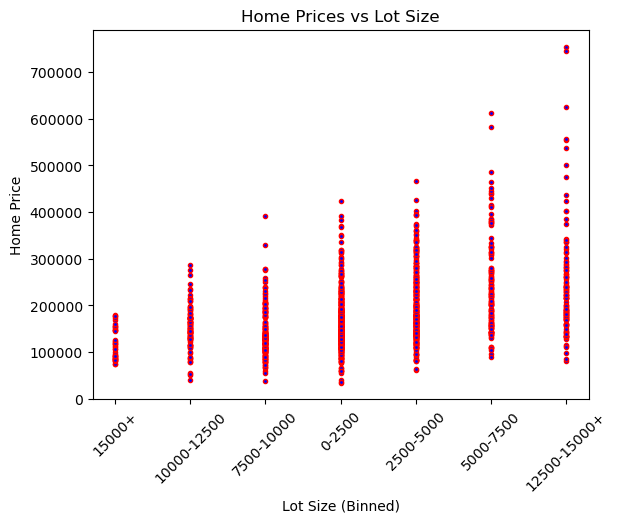

In [6]:
# Define the bin edges and labels for 'LotArea'
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, float('inf')]
labels = ['0-2500', '2500-5000', '5000-7500', '7500-10000', '10000-12500', '12500-15000+', '15000+']

# Create a new column 'LotAreaBin' with the binned values
housing_df['LotAreaBin'] = pd.cut(housing_df['LotArea'], bins=bins, labels=labels)

# Encode 'LotAreaBin' into numeric values for the scatter plot
housing_df['LotAreaCode'] = pd.Categorical(housing_df['LotAreaBin']).codes

# Sort the values based on 'LotAreaCode' to maintain the order in the plot
housing_df['LotAreaCode'].sort_values(ascending=False)

# Scatter plot
plt.scatter(housing_df['LotAreaCode'], housing_df['SalePrice'], c="blue", linewidths=1, marker="o", edgecolor="red", s=9)
plt.title('Home Prices vs Lot Size')
plt.ylabel('Home Price')
plt.xlabel('Lot Size (Binned)')
plt.xticks(ticks=housing_df['LotAreaCode'].unique(), labels=labels, rotation=45)

# Compute and print the correlation
correlation = stats.pearsonr(housing_df['LotAreaCode'], housing_df['SalePrice'])
print(f"The correlation is: {correlation[0]}")

plt.show()


The correlation is: 0.42281990678759784


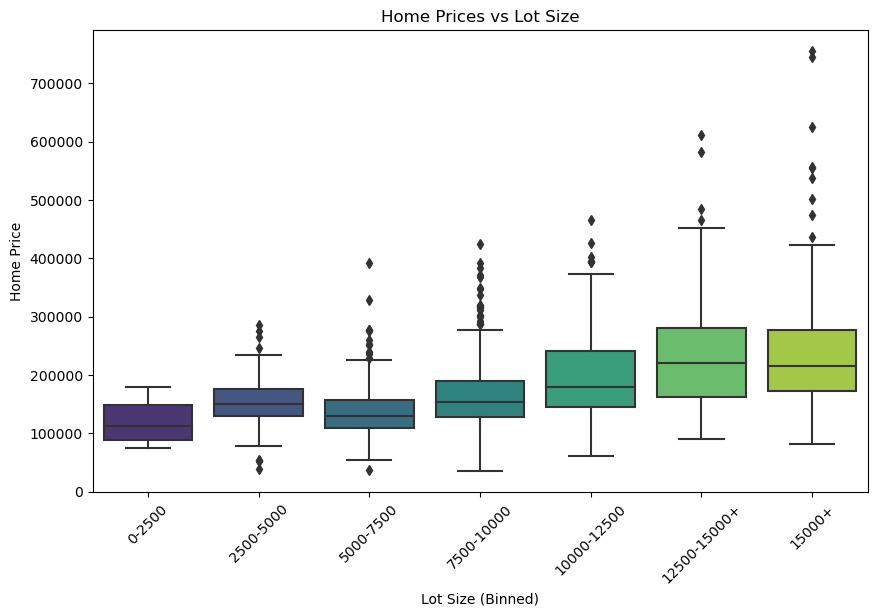

In [41]:
# Define the bin edges and labels for 'LotArea'
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, float('inf')]
labels = ['0-2500', '2500-5000', '5000-7500', '7500-10000', '10000-12500', '12500-15000+', '15000+']

# Create a new column 'LotAreaBin' with the binned values
housing_df['LotAreaBin'] = pd.cut(housing_df['LotArea'], bins=bins, labels=labels)

# Sort the values based on 'LotAreaCode' to maintain the order in the plot
housing_df['LotAreaCode'] = pd.Categorical(housing_df['LotAreaBin']).codes
housing_df['LotAreaCode'].sort_values(ascending=False)


# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotAreaBin', y="SalePrice", data=housing_df, palette='viridis')
plt.title('Home Prices vs Lot Size')
plt.xlabel('Lot Size (Binned)')
plt.ylabel('Home Price')

# Compute and print the correlation (optional)
correlation = stats.pearsonr(housing_df['LotAreaCode'], housing_df['SalePrice'])
print(f"The correlation is: {correlation[0]}")

plt.xticks(rotation=45)
plt.show()


In [8]:
# Home prices by the year Sold
housing_df.groupby(['BedroomAbvGr']).agg({'SalePrice':['mean','median','std','min', 'max']})

SalePrice                                      
                   mean     median        std     min     max
BedroomAbvGr                                                 
0            221,493.17 202,500.00 106,675.89  108959  385000
1            173,162.42 145,250.00 102,975.07   35311  501837
2            158,197.66 137,250.00  78,197.11   34900  611657
3            181,056.87 169,945.00  63,793.92   40000  451950
4            220,421.25 193,500.00 109,510.52   64500  755000
5            180,819.05 161,500.00  68,472.48   81000  320000
6            143,779.00 141,000.00  26,455.38  119000  200000
8            200,000.00 200,000.00        NaN  200000  200000

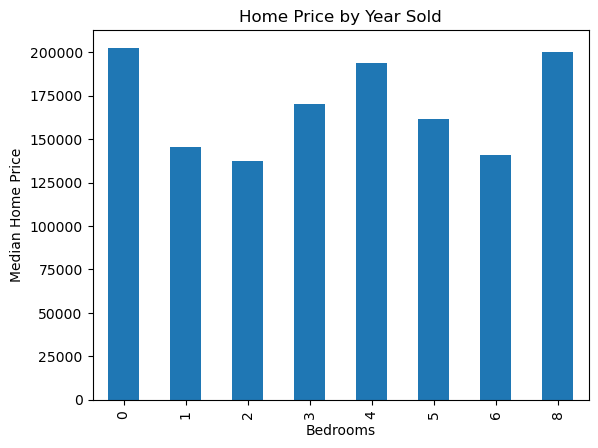

The correlation is: 0.16821315430073996


In [63]:
# Median Home Price by year it was sold
bedroom = housing_df.groupby(['BedroomAbvGr'])
group0 = bedroom['SalePrice'].median()
price_chart0 = group0.plot(kind='bar', title ='Home Price by Year Sold').invert_xaxis()
plt.gca().invert_xaxis()

plt.xlabel('Bedrooms')
plt.ylabel('Median Home Price')
plt.show()

# Compute and print the correlation (optional)
correlation = stats.pearsonr(housing_df['BedroomAbvGr'], housing_df['SalePrice'])
print(f"The correlation is: {correlation[0]}")

In [52]:
# Home prices by Overall Condition
housing_df.groupby(['OverallCond']).agg({'SalePrice':['mean','median','var','std','min', 'max']})

SalePrice                                                        
                  mean     median               var        std     min     max
OverallCond                                                                   
1            61,000.00  61,000.00               NaN        NaN   61000   61000
2           141,986.40  85,000.00 19,977,790,924.80 141,342.81   67000  394432
3           101,929.40  89,500.00  2,011,745,895.33  44,852.49   35311  200624
4           120,438.44 115,000.00  1,514,963,022.96  38,922.53   40000  235000
5           203,146.91 185,000.00  7,244,958,064.57  85,117.32   34900  745000
6           153,961.59 142,750.00  3,689,100,978.35  60,737.97   37900  755000
7           158,145.49 145,000.00  2,858,847,281.01  53,468.19   79900  402000
8           155,651.74 142,500.00  2,743,155,780.39  52,375.14   84500  335000
9           216,004.55 176,200.00  9,309,543,311.69  96,485.97  110500  475000

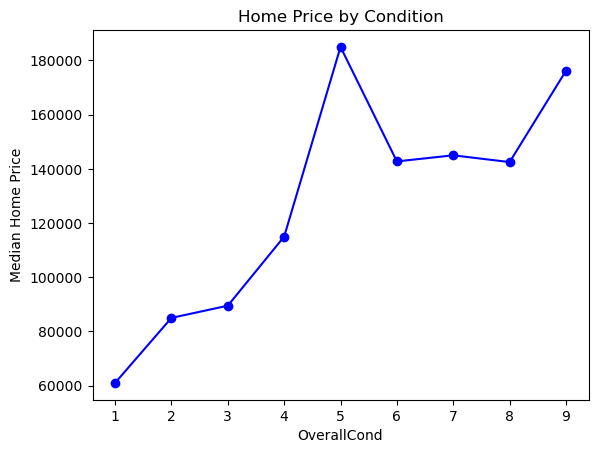

In [53]:
# Median Home Price by the overall condtion rating of the home
hse = housing_df.groupby(['OverallCond'])
group1 = hse['SalePrice'].median()
price_chart1 = group1.plot(kind='line', title='Home Price by Condition', marker='o', color='blue')
plt.ylabel('Median Home Price')
plt.show()

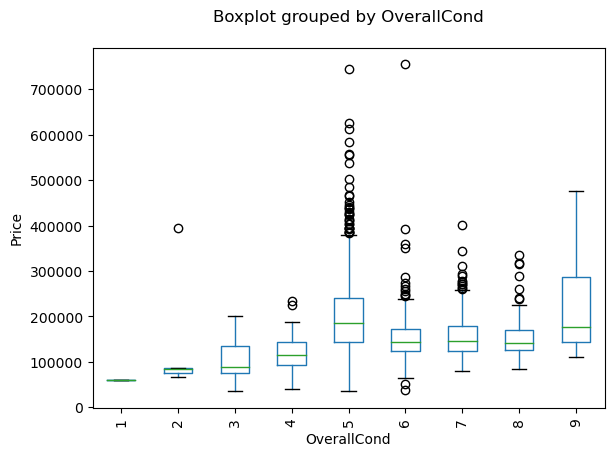

The correlation is: -0.07785589404867801


In [65]:
# Boxplot of the Price by Condtion ratiing
housing_df.boxplot(column = "SalePrice", by = "OverallCond", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Price")
plt.show()

# Compute and print the correlation (optional)
correlation = stats.pearsonr(housing_df['OverallCond'], housing_df['SalePrice'])
print(f"The correlation is: {correlation[0]}")

In [13]:
# Home prices by Neighborhood
housing_df.groupby(['GrLivArea']).agg({'SalePrice':['mean','median','std','min', 'max']})

SalePrice                               
                mean     median std     min     max
GrLivArea                                          
334        39,300.00  39,300.00 NaN   39300   39300
438        60,000.00  60,000.00 NaN   60000   60000
480        35,311.00  35,311.00 NaN   35311   35311
520        68,500.00  68,500.00 NaN   68500   68500
605        86,000.00  86,000.00 NaN   86000   86000
...              ...        ...  ..     ...     ...
3627      625,000.00 625,000.00 NaN  625000  625000
4316      755,000.00 755,000.00 NaN  755000  755000
4476      745,000.00 745,000.00 NaN  745000  745000
4676      184,750.00 184,750.00 NaN  184750  184750
5642      160,000.00 160,000.00 NaN  160000  160000

[861 rows x 5 columns]

In [14]:
# # Median Home Price by Neighborhood 
# grp = housing_df.groupby(['GrLivArea'])
# group = grp['SalePrice'].median().sort_values(ascending=False)
# price_chart = group.plot(kind='bar', title ='Home Price by Neighborhood')
# plt.ylabel('Median Home Price')
# plt.show()

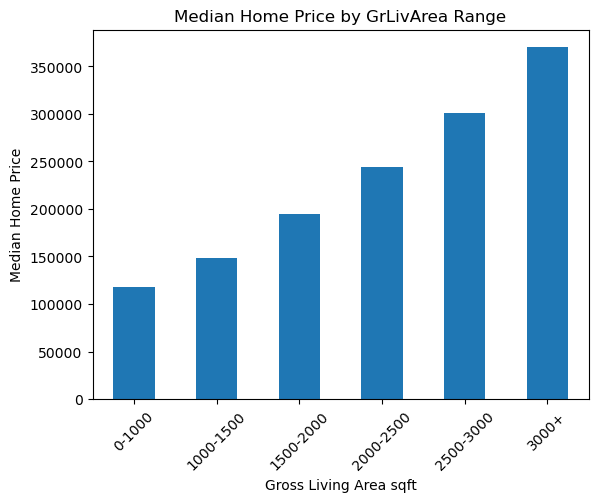

The correlation is: 0.708624477612652


In [68]:
# Define the bin edges and labels for 'GrLivArea'
bins = [0, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = ['0-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+']

# Create a new column 'GrLivAreaBin' with the binned values
housing_df['GrLivAreaBin'] = pd.cut(housing_df['GrLivArea'], bins=bins, labels=labels)

# Group by 'GrLivAreaBin' and calculate the median home price for each bin
grp = housing_df.groupby(['GrLivAreaBin'])
group = grp['SalePrice'].median()

# Plot the median home prices by bin
price_chart = group.plot(kind='bar', title='Median Home Price by GrLivArea Range')
plt.xlabel('Gross Living Area sqft')
plt.ylabel('Median Home Price')
plt.xticks(rotation=45)
plt.show()

# Compute and print the correlation (optional)
correlation = stats.pearsonr(housing_df['GrLivArea'], housing_df['SalePrice'])
print(f"The correlation is: {correlation[0]}")

In [69]:
# # Count missing/null values for each variable
# housing_df.isnull().sum()

In [17]:
# # Check datatype of variables
# housing_df.info()

In [18]:
# # Get quick summary of the variables.
# housing_df.describe()

In [19]:
# Save cleaned dataframe to a cvs
# housing_df.to_csv('housing.csv',index=False)

C:\Users\rober\AppData\Local\Temp\ipykernel_15168\912448867.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_df.corr(),


<Axes: >

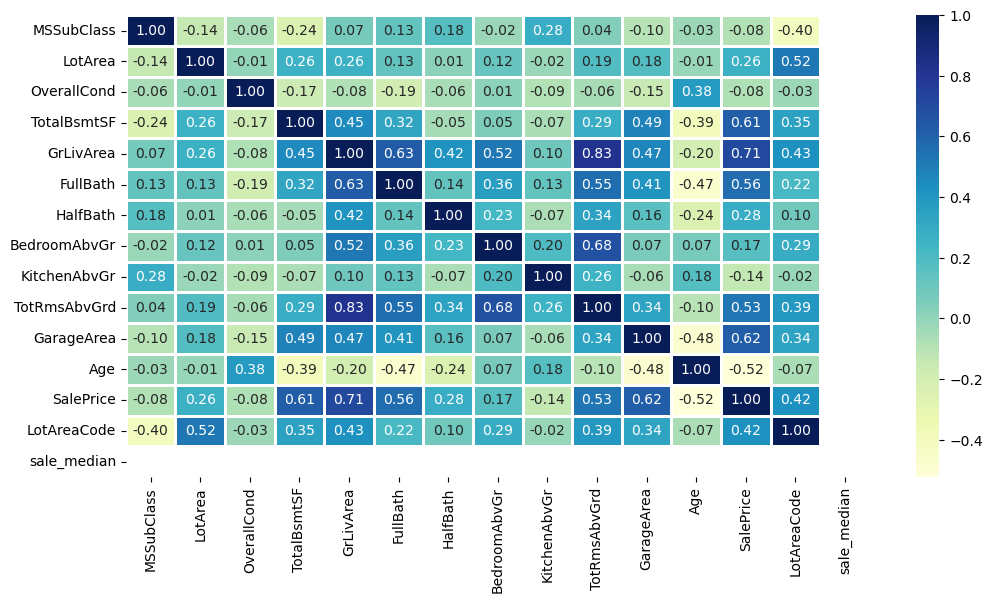

In [81]:
plt.figure(figsize=(12, 6))
sns.heatmap(housing_df.corr(),
            cmap = 'YlGnBu',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

C:\Users\rober\AppData\Local\Temp\ipykernel_15168\1535364262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = housing_df.corr().round(2)


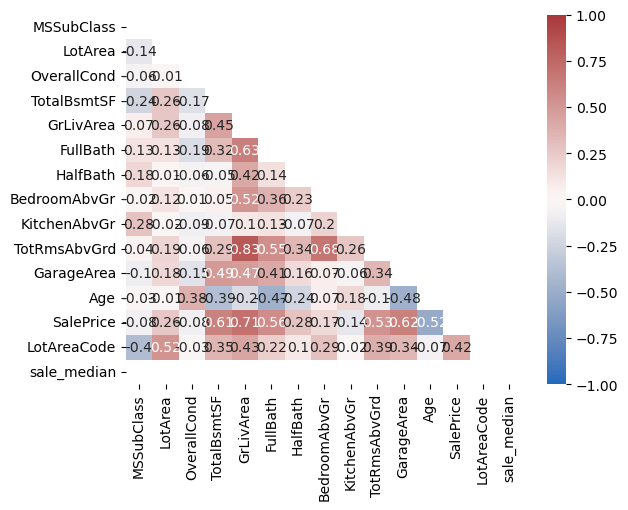

In [84]:
# Find correlation between the varaibles and plot a heatmap of the relationships
mat = housing_df.corr().round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [21]:
# Check the kind of relationship between variables
# scatter_matrix(housing_df, alpha = 0.2, figsize = (20, 20), diagonal = 'hist')

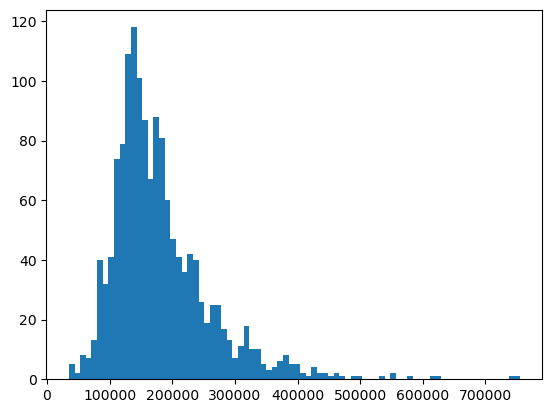

In [22]:
# Run some exploratory plots to find relationships.
plt.hist(housing_df['SalePrice'], bins=80)
plt.show()

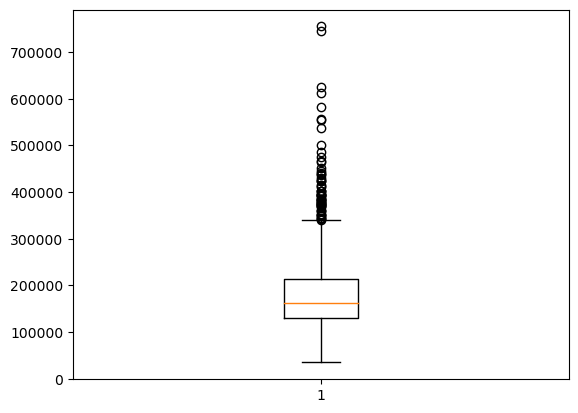

In [23]:
plt.boxplot(housing_df['SalePrice'])
plt.show()

C:\Users\rober\AppData\Local\Temp\ipykernel_15168\1649768311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(housing_df.corr())


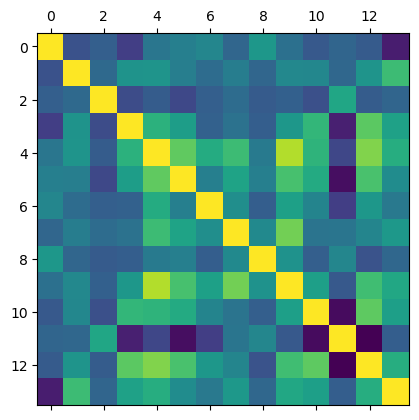

In [24]:
plt.matshow(housing_df.corr())
plt.show()

In [87]:
housing_df.head()

,MSSubClass,LotArea,OverallCond,Exterior1st,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,Neighborhood,Age,SalePrice,LotAreaBin,LotAreaCode,GrLivAreaBin,sale_median
0,60,8450,5,VinylSd,856,Y,1710,2,1,3,1,8,548,CollgCr,5,208500,7500-10000,3,1500-2000,"163,000.00"
1,20,9600,8,MetalSd,1262,Y,1262,2,0,3,1,6,460,Veenker,31,181500,7500-10000,3,1000-1500,"163,000.00"
2,60,11250,5,VinylSd,920,Y,1786,2,1,3,1,6,608,CollgCr,7,223500,10000-12500,4,1500-2000,"163,000.00"
3,70,9550,5,Wd Sdng,756,Y,1717,1,0,3,1,7,642,Crawfor,91,140000,7500-10000,3,1500-2000,"163,000.00"
4,60,14260,5,VinylSd,1145,Y,2198,2,1,4,1,9,836,NoRidge,8,250000,12500-15000+,5,2000-2500,"163,000.00"


In [91]:
# Create a copy of the dataframe to use in neural networks
nn_df = housing_df.copy()
nn_df = nn_df.drop(columns=['Neighborhood',"LotAreaBin","sale_median","GrLivAreaBin","LotAreaCode"])
nn_df.head()

,MSSubClass,LotArea,OverallCond,Exterior1st,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,Age,SalePrice
0,60,8450,5,VinylSd,856,Y,1710,2,1,3,1,8,548,5,208500
1,20,9600,8,MetalSd,1262,Y,1262,2,0,3,1,6,460,31,181500
2,60,11250,5,VinylSd,920,Y,1786,2,1,3,1,6,608,7,223500
3,70,9550,5,Wd Sdng,756,Y,1717,1,0,3,1,7,642,91,140000
4,60,14260,5,VinylSd,1145,Y,2198,2,1,4,1,9,836,8,250000


In [92]:
# nn_df = nn_df.drop(columns='Id', axis=1)
nn_df.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'Exterior1st', 'TotalBsmtSF',
       'CentralAir', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'Age', 'SalePrice'],
      dtype='object')

In [93]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy =  nn_df.dtypes[nn_df.dtypes == "object"].index.tolist()
df_dummies = pd.get_dummies(nn_df, columns=dummy)

df_dummies.head()

,MSSubClass,LotArea,OverallCond,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,Age,SalePrice,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,CentralAir_N,CentralAir_Y
0,60,8450,5,856,1710,2,1,3,1,8,548,5,208500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,9600,8,1262,1262,2,0,3,1,6,460,31,181500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,60,11250,5,920,1786,2,1,3,1,6,608,7,223500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,70,9550,5,756,1717,1,0,3,1,7,642,91,140000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,60,14260,5,1145,2198,2,1,4,1,9,836,8,250000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [94]:
# Calculate Z-values
df_dummies['price_scaled'] = np.abs(stats.zscore(df_dummies['SalePrice']))

# Filter out outliers
df_dummies = df_dummies[df_dummies['price_scaled'] <= 2.5]

# Drop the column
df_dummies = df_dummies.drop('price_scaled', axis=1)

In [95]:
df_dummies.describe()

,MSSubClass,LotArea,OverallCond,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,Age,SalePrice,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,CentralAir_N,CentralAir_Y
count,"1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00","1,420.00"
mean,57.28,"10,325.43",5.59,"1,033.47","1,484.81",1.55,0.37,2.86,1.05,6.44,463.19,37.33,"173,066.06",0.01,0.00,0.00,0.03,0.00,0.04,0.15,0.00,0.15,0.08,0.00,0.02,0.35,0.14,0.02,0.07,0.93
std,42.65,"9,899.16",1.11,413.12,486.66,0.54,0.50,0.81,0.22,1.56,206.86,30.10,"63,183.89",0.12,0.03,0.04,0.18,0.03,0.19,0.36,0.03,0.36,0.27,0.04,0.13,0.48,0.35,0.13,0.25,0.25
min,20.00,"1,300.00",1.00,0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,"34,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,"7,500.00",5.00,792.75,"1,122.75",1.00,0.00,2.00,1.00,5.00,318.75,8.00,"129,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,50.00,"9,362.00",5.00,978.50,"1,443.50",2.00,0.00,3.00,1.00,6.00,473.00,36.00,"160,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,70.00,"11,376.25",6.00,"1,261.25","1,740.50",2.00,1.00,3.00,1.00,7.00,576.00,55.00,"207,125.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
max,190.00,"215,245.00",9.00,"6,110.00","5,642.00",3.00,2.00,8.00,3.00,14.00,"1,418.00",136.00,"378,500.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


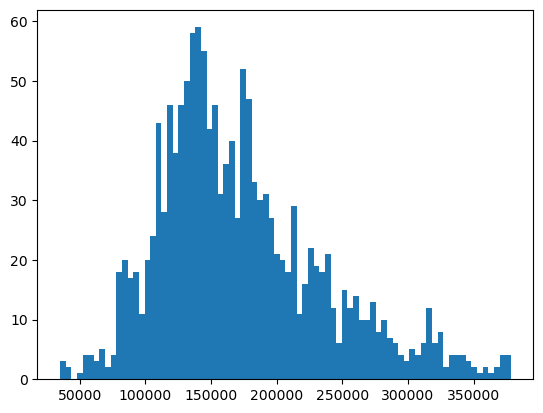

In [96]:
plt.hist(df_dummies['SalePrice'], bins=80)
plt.show()

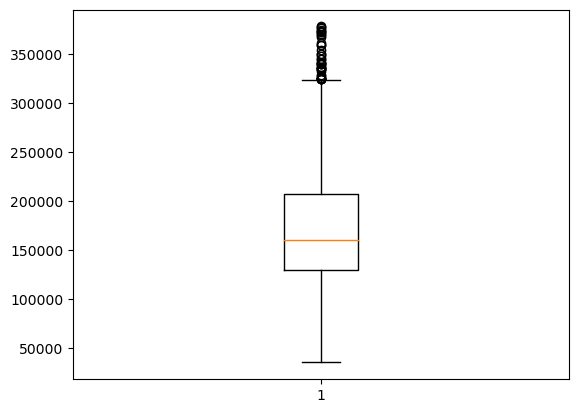

In [98]:
plt.boxplot(df_dummies['SalePrice'])
plt.show()

In [99]:
# Split our preprocessed data into our features and target arrays
y = df_dummies['SalePrice'].values
X = df_dummies.drop(['SalePrice'],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [100]:
y_train.min()

34900

In [101]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [102]:
X_test_scaled[:5]

array([[ 5.19779709e-02,  5.34795681e-02, -5.48480834e-01,
         2.30974642e-03,  1.22113085e+00,  8.46283224e-01,
         1.24507764e+00,  1.88391011e-01, -2.08416888e-01,
         1.00590286e+00,  1.84262470e+00, -1.20035341e+00,
        -1.19522861e-01, -2.96826089e-02, -4.19960526e-02,
        -1.91040180e-01, -2.96826089e-02, -2.00731264e-01,
        -4.25291877e-01, -2.96826089e-02, -4.28174419e-01,
        -2.73385862e-01, -2.96826089e-02, -1.33869888e-01,
         1.35646600e+00, -4.09295889e-01, -1.26886480e-01,
        -2.78924473e-01,  2.78924473e-01],
       [-4.13875875e-01,  1.31450590e+00,  3.55835897e-01,
         7.10565032e-01,  8.80410270e-02, -2.86559995e+00,
         1.24507764e+00, -3.56620879e+00, -2.08416888e-01,
        -1.55909299e+00,  6.07370843e-01, -2.07246879e-01,
        -1.19522861e-01, -2.96826089e-02, -4.19960526e-02,
        -1.91040180e-01, -2.96826089e-02, -2.00731264e-01,
        -4.25291877e-01, -2.96826089e-02, -4.28174419e-01,
         3.65

In [103]:
from tensorflow.keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [104]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  25
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                750       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 12)                312       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1725 (6.74 KB)
Trainable params: 1725 (6.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
# Compile the model
nn.compile(loss='mse', optimizer="adam", metrics=['accuracy', rmse])

In [106]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
36/36 [==============================] - 1s 1ms/step - loss: 34141589504.0000 - accuracy: 0.0000e+00 - rmse: 184474.6094
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 34140516352.0000 - accuracy: 0.0000e+00 - rmse: 184670.2500
Epoch 3/100
36/36 [==============================] - 0s 1ms/step - loss: 34137149440.0000 - accuracy: 0.0000e+00 - rmse: 184601.5312
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 34127470592.0000 - accuracy: 0.0000e+00 - rmse: 184274.5781
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 34102378496.0000 - accuracy: 0.0000e+00 - rmse: 184171.9375
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 34048413696.0000 - accuracy: 0.0000e+00 - rmse: 183901.0469
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 33946140672.0000 - accuracy: 0.0000e+00 - rmse: 183969.7969
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - lo

In [107]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 982733696.0000 - accuracy: 0.0000e+00 - rmse: 31211.7188 - 127ms/epoch - 14ms/step


ValueError: too many values to unpack (expected 2)

In [111]:
y_pred = nn.predict(X_test)
# print(MeanSquaredError(y_test, y_pred).numpy())

# print(f'y_actual: {y_test}, y_pred:{y_pred}')
y_pred[:5]

9/9 [==============================] - 0s 1ms/step


array([[1.4340067e+08],
       [2.2716834e+08],
       [9.7392640e+07],
       [1.0950134e+08],
       [1.3943434e+08]], dtype=float32)

In [109]:
# from sklearn.preprocessing import StandardScaler,OneHotEncoder
# sales_cat = nn_df.dtypes[nn_df.dtypes == "object"].index.tolist()
# sales_cat

['Exterior1st', 'CentralAir']

In [110]:
# # Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# # Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(nn_df[sales_cat]))

# # Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(sales_cat)
# encode_df.head()

c:\Users\rober\anaconda3\envs\RUTDataViz2023\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,CentralAir_N,CentralAir_Y
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


In [ ]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)